In [1]:
!pip install -U matplotlib

     |████████████████████████████████| 12.4MB 9.7kB/s eta 0:00:01   |▏                               | 81kB 2.6MB/s eta 0:00:05     |███▋                            | 1.4MB 2.6MB/s eta 0:00:05     |███████████▍                    | 4.4MB 1.1MB/s eta 0:00:08     |█████████████████████████▋      | 9.9MB 721kB/s eta 0:00:04
  Found existing installation: matplotlib 3.0.0
    Uninstalling matplotlib-3.0.0:
      Successfully uninstalled matplotlib-3.0.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
oildata = pd.read_csv('MPOB_data1.csv')
oildata.head()

,Year,Month,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
0,2006,Jan,424.0,532.0,930.0,591.0,733.0,569.0,750.0,445.0,407.0
1,2006,Feb,445.0,535.0,921.0,595.0,723.0,591.0,761.0,430.0,405.0
2,2006,Mar,440.0,539.0,902.0,606.0,742.0,575.0,807.0,410.0,431.0
3,2006,Apr,439.0,540.0,899.0,659.0,796.0,578.0,840.0,394.0,437.0
4,2006,May,440.0,588.0,892.0,679.0,838.0,583.0,841.0,408.0,447.0


In [4]:
oildata.describe()

,Year,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
count,156.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2012.000000,792.725490,947.856209,1414.601307,988.843137,992.202614,1149.137255,1482.954248,853.215686,792.594771
std,3.753708,205.275336,229.628287,515.906259,314.525292,227.338443,364.608443,456.779751,220.306095,209.217321
min,2006.000000,424.000000,532.000000,0.000000,0.000000,709.000000,569.000000,620.000000,394.000000,405.000000
25%,2009.000000,663.000000,790.000000,1214.000000,802.000000,817.000000,861.000000,1015.000000,737.000000,638.000000
50%,2012.000000,771.000000,883.000000,1356.000000,887.000000,896.000000,1131.000000,1580.000000,838.000000,762.000000
75%,2015.000000,906.000000,1140.000000,1673.000000,1221.000000,1190.000000,1439.000000,1800.000000,1025.000000,930.000000
max,2018.000000,1292.000000,1537.000000,2555.000000,2045.000000,1577.000000,2256.000000,2400.000000,1363.000000,1392.000000


In [5]:
oildata.mean().sort_values(ascending=False)[1:]

FishOil          1482.954248
GroundnutOil     1414.601307
CoconutOil       1149.137255
RapeseedOil       992.202614
SunflowerOil      988.843137
SoyabeanOil       947.856209
Tallow            853.215686
CrudePalmOil      792.725490
Lard              792.594771
dtype: float64

Text(0, 0.5, 'prices')

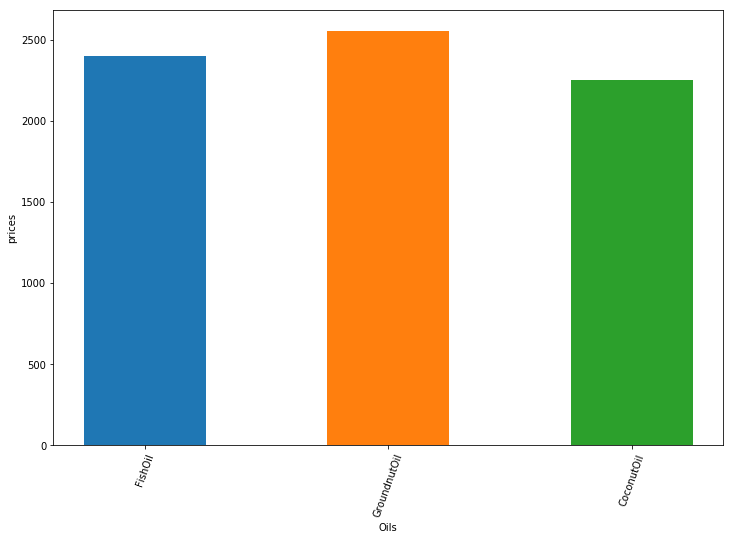

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

plt.xticks(rotation=70)

plt.bar('FishOil', oildata['FishOil '], width=0.5)
plt.bar('GroundnutOil', oildata['GroundnutOil '], width = 0.5)
plt.bar('CoconutOil', oildata['CoconutOil '], width = 0.5)

plt.xlabel('Oils')
plt.ylabel('prices')



In [10]:
maxVal = oildata['GroundnutOil '].max()
maxVal

2555.0

In [11]:
oildata[:][oildata['GroundnutOil '] == maxVal]
#same can be done with min()

,Year,Month,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
76,2012,May,1085.0,1218.0,2555.0,1275.0,1235.0,1155.0,1758.0,1223.0,1045.0


In [13]:
minVal = oildata['GroundnutOil '].min()

In [12]:
meanVal = oildata['GroundnutOil '].mean()
meanVal

1414.6013071895425

In [16]:
midVal = oildata['GroundnutOil '].median()
midVal

1356.0

Text(0, 0.5, 'prices')

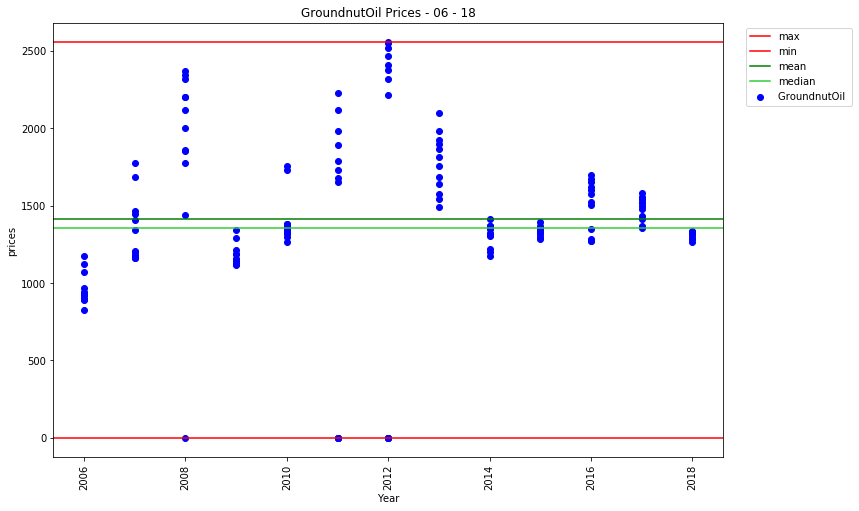

In [20]:
# scatter plot

fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(rotation=90)

plt.scatter(oildata['Year'], oildata['GroundnutOil '], color='blue')

plt.axhline(maxVal, label='max', color='red')
plt.axhline(minVal, label='min', color='red')

plt.axhline(meanVal, label='mean', color='green')
plt.axhline(midVal, label='median', color='limegreen')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('GroundnutOil Prices - 06 - 18')
plt.xlabel('Year')
plt.ylabel('prices')

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
oildata.dropna(axis=0, inplace=True)

In [24]:
groundfish = oildata[['GroundnutOil ', 'FishOil ']]
groundfish.head()

,GroundnutOil,FishOil
0,930.0,750.0
1,921.0,761.0
2,902.0,807.0
3,899.0,840.0
4,892.0,841.0


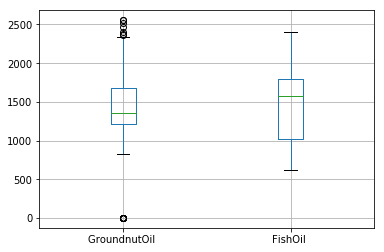

In [25]:
groundfish.boxplot()

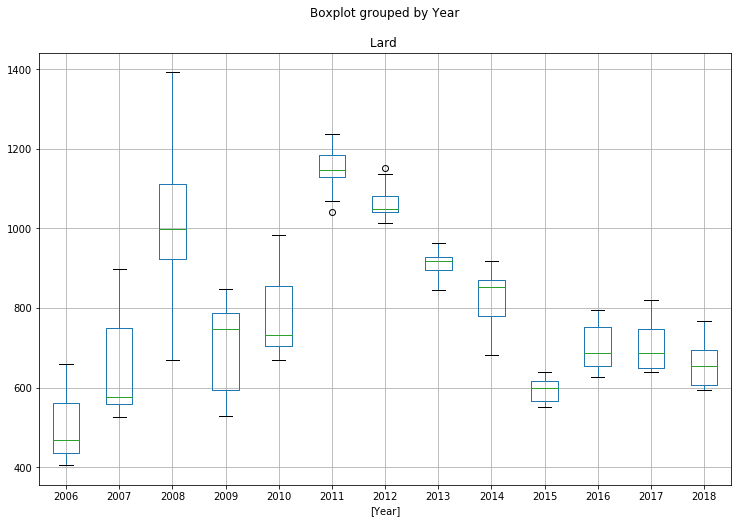

In [27]:
oildata.boxplot(column=['Lard '], by=['Year'], figsize=(12,8))

In [29]:
cols = oildata.columns[2:].values
cols

array(['CrudePalmOil ', 'SoyabeanOil ', 'GroundnutOil ', 'SunflowerOil ',
       'RapeseedOil ', 'CoconutOil ', 'FishOil ', 'Tallow ', 'Lard '],
      dtype=object)

In [30]:
oildataArray = oildata.iloc[:,2:].values
oildataArray

array([[ 424.,  532.,  930., ...,  750.,  445.,  407.],
       [ 445.,  535.,  921., ...,  761.,  430.,  405.],
       [ 440.,  539.,  902., ...,  807.,  410.,  431.],
       ...,
       [ 590.,  775., 1289., ..., 1325.,  735.,  598.],
       [ 561.,  766., 1281., ..., 1355.,  780.,  607.],
       [ 551.,  757., 1265., ..., 1400.,  730.,  679.]])

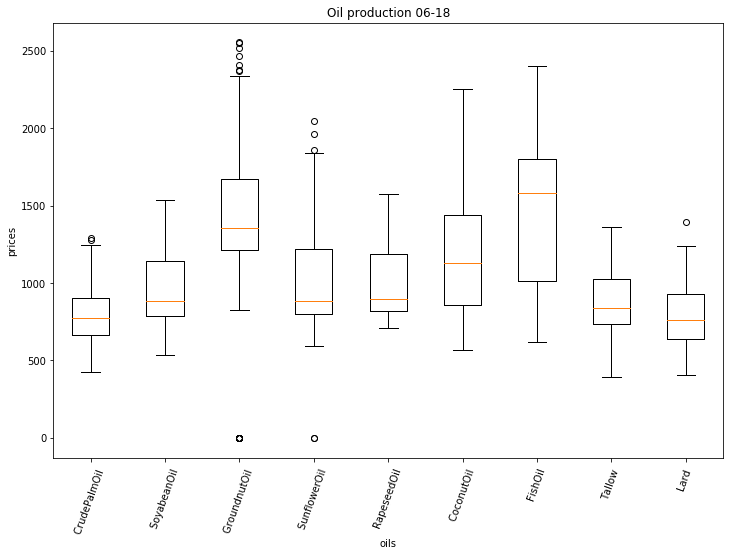

In [32]:
#no pandas

fig, ax = plt.subplots(figsize=(12,8))

bp = plt.boxplot(oildataArray)

plt.xticks(rotation=70)
plt.xticks([1,2,3,4,5,6,7,8,9], cols)

plt.title('Oil production 06-18')
plt.xlabel('oils')
plt.ylabel('prices')
plt.show()

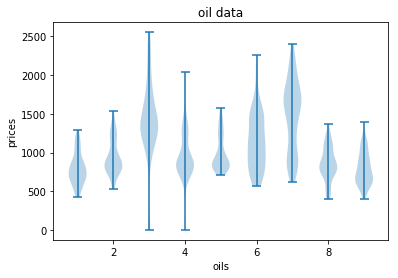

In [33]:
# violinplot

vp = plt.violinplot(oildataArray)
plt.title('oil data')
plt.xlabel('oils')
plt.ylabel('prices')
plt.show()

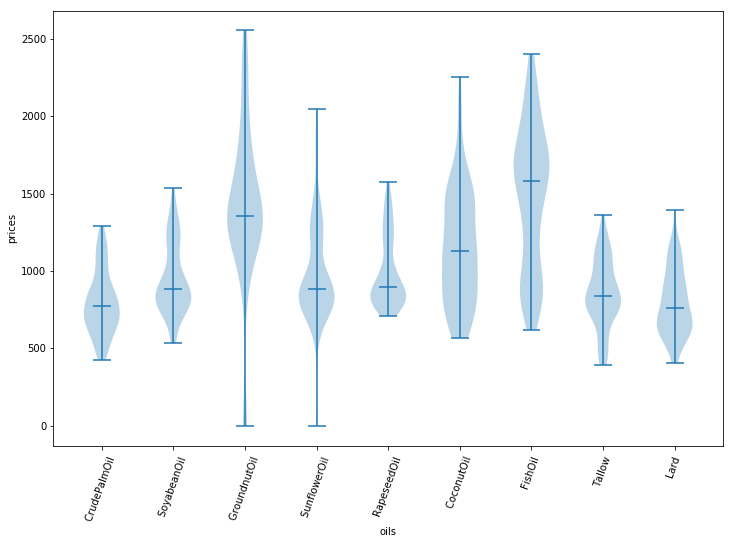

In [34]:
fig, ax = plt.subplots(figsize=(12,8))

vp = plt.violinplot(oildataArray, showmedians=True)

plt.xticks(rotation=70)
plt.xticks([1,2,3,4,5,6,7,8,9], cols)

plt.xlabel('oils')
plt.ylabel('prices')
plt.show()

In [35]:
oildata[['Month', 'FishOil ']].groupby('Month').mean()

,FishOil
Month,
Apr,1481.692308
Aug,1473.307692
Dec,1537.083333
Feb,1511.538462
Jan,1508.307692
Jul,1453.923077
Jun,1433.923077
Mar,1507.230769
May,1474.384615


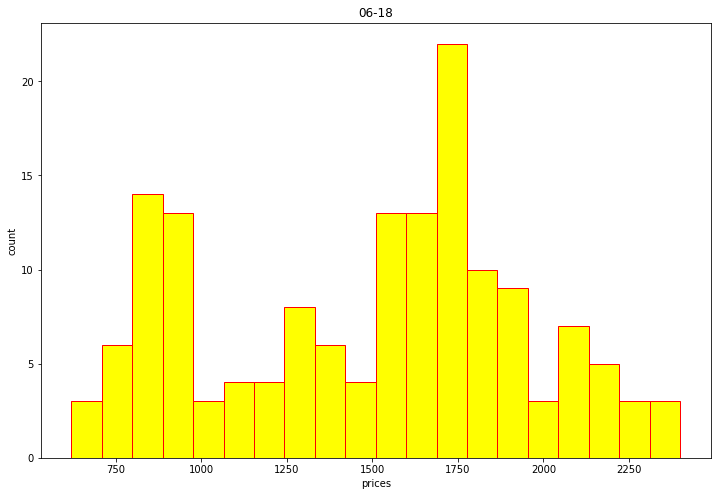

In [37]:
# historgram

fig, ax = plt.subplots(figsize=(12,8))

n, bins, patches = plt.hist(oildata['FishOil '],
                           facecolor='yellow',
                            edgecolor='red',
                            bins=20)

plt.title('06-18')

plt.xlabel('prices')
plt.ylabel('count')
plt.show()

In [38]:
print('n: ', n)
print('bins: ', bins)
print('patches: ', patches)

n:  [ 3.  6. 14. 13.  3.  4.  4.  8.  6.  4. 13. 13. 22. 10.  9.  3.  7.  5.
  3.  3.]
bins:  [ 620.  709.  798.  887.  976. 1065. 1154. 1243. 1332. 1421. 1510. 1599.
 1688. 1777. 1866. 1955. 2044. 2133. 2222. 2311. 2400.]
patches:  <a list of 20 Patch objects>


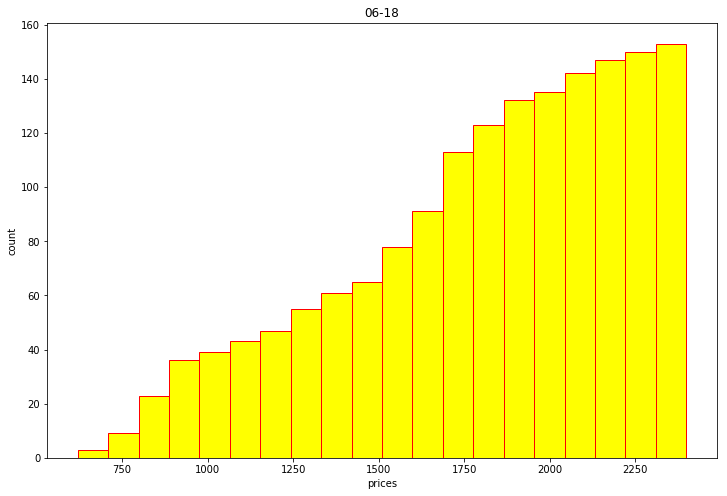

In [40]:
# historgram + cum

fig, ax = plt.subplots(figsize=(12,8))

n, bins, patches = plt.hist(oildata['FishOil '],
                           facecolor='yellow',
                            edgecolor='red',
                            bins=20,
                            cumulative=True)

plt.title('06-18')

plt.xlabel('prices')
plt.ylabel('count')
plt.show()

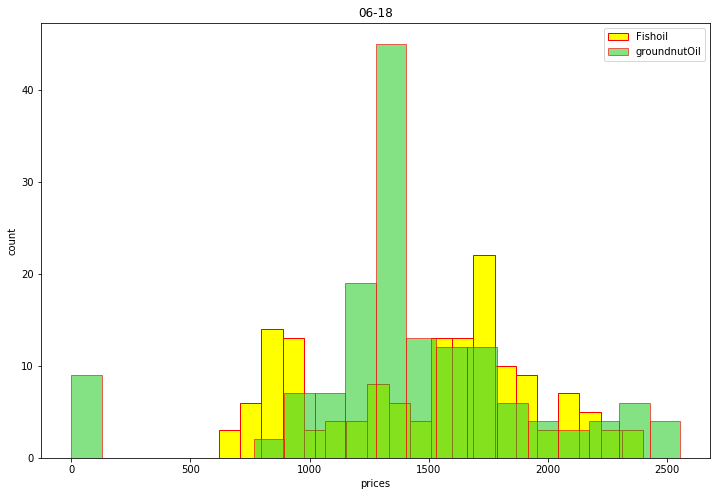

In [42]:
# historgram overlay

fig, ax = plt.subplots(figsize=(12,8))

plt.hist(oildata['FishOil '],
                           facecolor='yellow',
                            edgecolor='red',
                             label='Fishoil',
                            bins=20)

plt.hist(oildata['GroundnutOil '],
                           facecolor='limegreen',
                            edgecolor='red',
                            label='groundnutOil',
                             alpha=0.6,
                            bins=20)


plt.legend()
plt.title('06-18')

plt.xlabel('prices')
plt.ylabel('count')
plt.show()